In [ ]:
### uncommnet these if this is the first time you use these packages ####
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install seaborn
# !pip install pyod
# !pip install PiML

In [1]:
# mute warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Data set
**We're going to use the Motor Trends Cars ("mtcars") data set that is built into the R programming language.**
```
mpg - Miles per Gallon
cyl - # of cylinders
disp - displacement, in cubic inches
hp - horsepower
drat - driveshaft ratio
wt - weight
qsec - 1/4 mile time; a measure of acceleration
vs - 'V' or straight - engine shape
am - transmission; auto or manual
gear - # of gears
carb - # of carburetors.
```

In [2]:
# Load the dataset
df = pd.read_csv("data/mtcars.csv")
# Here we are going to use the "model" of the car as a the index to our dataframe
df.set_index('model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Descriptive statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
# Check whether there are any missing values
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [5]:
# Heatmap based on standardized values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
# scaled_df.abs().sum(axis=1)
df.style.background_gradient(cmap ='coolwarm', gmap=scaled_df, axis=None, vmin=-3, vmax=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2


# Use regression models to predict fuel comsumption(mpg)

In [6]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### split the dataset into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.1, random_state=42)

## Linear Regression

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print(X_train.columns)
print(regr.coef_)
#Predict using the test set
pred = regr.predict(X_test)

#Calculate the metrics for regression
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
print('------------')
print(reg_r2, reg_mse)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.40110818  0.01316612 -0.02167558  0.59836675 -3.83000087  0.70898298
  0.07163707  1.57941842  0.659154    0.0778369 ]
------------
0.8383955580471787 9.935744099588113


## SVM for regression

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
# Create svm regression object
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))

# Train the model using the training sets
regr_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [11]:
#Predict using the test set
pred = regr_svm.predict(X_test)

#Calculate the metrics for regression
svm_r2 = r2_score(y_test, pred)
svm_mse = mean_squared_error(y_test, pred)

In [12]:
print(svm_r2, svm_mse)

0.784034144131135 13.27798575479757


## Gradient Boosting for regression

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
# Create gradient boosting regression object
reg_gb = GradientBoostingRegressor(random_state=0)

# Train the model using the training sets
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [15]:
#Predict using the test set
pred = reg_gb.predict(X_test)

#Calculate the metrics for regression
gb_r2 = r2_score(y_test, pred)
gb_mse = mean_squared_error(y_test, pred)

In [16]:
#Make a table to compare the performance of different models
pd.DataFrame({'LinearRegression':[reg_r2,reg_mse], 'SVM':[svm_r2, svm_mse],  'GradientBoosting':[gb_r2, gb_mse]}, index=['R2', 'MSE'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
MSE,9.935744,13.277986,7.590488


## Outlier Detection: univariate case

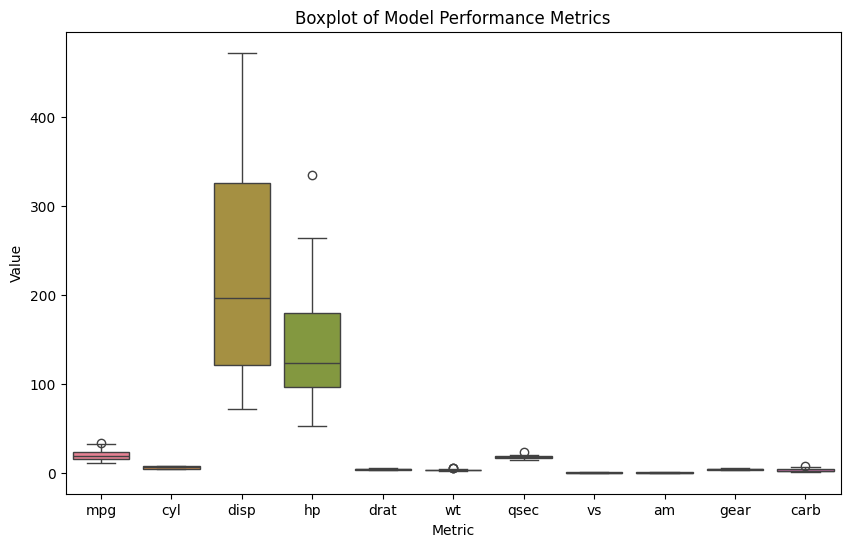

In [20]:
#use sns.boxplot to find univariate outliers
###################################
############ code here ############
###################################

#copy of df
df_copy = df.copy()

# Plotting
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_copy)
# Add titles and labels
plt.title('Boxplot of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
# Find the outliers for "wt"
wtQ1 = df['wt'].quantile(0.25)
wtQ3 = df['wt'].quantile(0.75)
wtIQR = wtQ3 - wtQ1    #IQR is interquartile range.
print(wtQ1, wtQ3, wtIQR)

wt_upper_limit = (wtQ3 + 1.5 * wtIQR)
wt_lower_limit = (wtQ1 - 1.5 * wtIQR)
# Show the boxplot outliers
df.loc[(df['wt'] < wt_lower_limit) | (df['wt'] > wt_upper_limit)]

In [ ]:
# Find the outliers for "hp" and "qsec"
###################################
############ code here ############
###################################

## Outlier Treatments

### Capping Outliers (using IQR)

In [ ]:
df2 = X_train.copy()

In [ ]:
# This code will "cap" (or floor) the outliers to our limit for the wt predictor
df2['wt'] = np.where(df2['wt'] > wt_upper_limit,
  wt_upper_limit,
  np.where(
    df2['wt'] < wt_lower_limit,
    wt_lower_limit,
    df2['wt']
   )
)

In [ ]:
# Write code to cap/floor the hp and qsec predictors
###################################
############ code here ############
###################################

In [ ]:
# Use describe to ensure our min/max looks right
df2.describe()

In [ ]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df2, y_train)
pred = regr.predict(X_test)
reg_r2_capped = r2_score(y_test, pred)
reg_mse_capped = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df2, y_train)
pred = regr_svm.predict(X_test)
svm_r2_capped = r2_score(y_test, pred)
svm_mse_capped = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df2, y_train)
pred = reg_gb.predict(X_test)
gb_r2_capped = r2_score(y_test, pred)
gb_mse_capped = mean_squared_error(y_test, pred)

In [ ]:
# compare metrics: no treatment VS "capped"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

In [ ]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

### Removing rows with outliers

In [ ]:
df3 = X_train.copy()

In [ ]:
# This code will remove outliers beyond our limit for the wt predictor
y_train.drop(y_train[(df3.wt < wt_lower_limit) | (df3.wt > wt_upper_limit)].index, inplace=True)
df3.drop(df3[df3.wt < wt_lower_limit].index, inplace=True)
df3.drop(df3[df3.wt > wt_upper_limit].index, inplace=True)

In [ ]:
# Write code to remove outliers beyond our limit for the hp and qsec predictors
###################################
############ code here ############
###################################

In [ ]:
# Use describe to ensure our min/max looks right
df3.describe()

In [ ]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df3, y_train)
pred = regr.predict(X_test)
reg_r2_removed = r2_score(y_test, pred)
reg_mse_removed = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df3, y_train)
pred = regr_svm.predict(X_test)
svm_r2_removed = r2_score(y_test, pred)
svm_mse_removed = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df3, y_train)
pred = reg_gb.predict(X_test)
gb_r2_removed = r2_score(y_test, pred)
gb_mse_removed = mean_squared_error(y_test, pred)

In [ ]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed]},
    index=['R2', 'R2_capped', 'R2_removed'])

In [ ]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed]},
    index=['MSE', 'MSE_capped', 'MSE_removed'])

## Outlier Detection: multivariate case

In [ ]:
# If not already installed, install pyod
#!pip install pyod

In [ ]:
# use LOF (with 5 nearest neighbors) to detection multivariate outliers
# and eliminate rows with and lof score > 1.3
from pyod.models.lof import LOF

df4 = df.copy()

###################################
############ code here ############
###################################

In [ ]:
# Rebuild the models

########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(X_train_lof, y_train_lof)
pred = regr.predict(X_test)
reg_r2_removed_lof = r2_score(y_test, pred)
reg_mse_removed_lof = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(X_train_lof, y_train_lof)
pred = regr_svm.predict(X_test)
svm_r2_removed_lof = r2_score(y_test, pred)
svm_mse_removed_lof = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(X_train_lof, y_train_lof)
pred = reg_gb.predict(X_test)
gb_r2_removed_lof = r2_score(y_test, pred)
gb_mse_removed_lof = mean_squared_error(y_test, pred)

In [ ]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])

In [ ]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

# Q1. What were the top 4 most influential features in the `regr` model above?


# Q2. What was the most influential features in the `regr` model above?  What was the most influential feature in the `reg_gb` model above?


# Q3. In the original data set (`df`) which car looks more like a *bivariate outlier* with respect to `disp` and `drat`?  *Masarati Bora*, *Ford Pantera L*, or the *Toyota Corolla*?

# Q4. Could the `scipy.stats.mstats.winsorize` function in Python be used to easily treat *only* the outliers we found with `sns.boxplot`?  Explain.


# Q5. How does the "capping" the outliers affect model performance?  What happens if you change the `random_state` to 43 in the train/test split (and then re-build the models)?  What could be done to provide more robust error metrics?


# Q6. *On average (given many different train/test splits)*, what modeling method is most affected by the removal of outliers in this data set?  Why?


# Q7. What car has the 4th highest LOF value?  What attributes of this car showed up as univariate outliers according to our boxplots (IQR * 1.5 method)?


# Q8. In LOF method, there is a hyperparameter, what is it?  And what does it represent?

# Q9. Which outlier treatment worked best on this data set? [given the random_state=42 when splitting the data]

# Q10. Which model is most likely to exhibit benign over-fitting?  If we theoretically put these models into production and tested them on new (previously unseen) cars, how might we detect that over-fitting?  Is it possible that what we previously treated as "outliers" would appear more "normal" in our data over time?